In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('911.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130353 entries, 0 to 130352
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        130353 non-null  float64
 1   lng        130353 non-null  float64
 2   desc       130353 non-null  object 
 3   zip        113845 non-null  float64
 4   title      130353 non-null  object 
 5   timeStamp  130352 non-null  object 
 6   twp        130313 non-null  object 
 7   addr       130352 non-null  object 
 8   e          130352 non-null  float64
dtypes: float64(4), object(5)
memory usage: 9.0+ MB


In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1.0
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1.0
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1.0
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1.0


In [8]:
# Quais são os top 5 CEPS (zip) nas chamadas 911?
df['zip'].value_counts().head(5)

19401.0    9047
19464.0    8730
19403.0    6413
19446.0    6228
19406.0    4177
Name: zip, dtype: int64

In [9]:
# Quais são os top 5 municípios nas chamadas 911?
df['twp'].value_counts().head()

LOWER MERION    11261
ABINGTON         7892
NORRISTOWN       7616
UPPER MERION     6780
CHELTENHAM       6035
Name: twp, dtype: int64

In [10]:
# Dê uma olhada na coluna 'title'. Quantos códigos de título exclusivos existem?
df['title']

0              EMS: BACK PAINS/INJURY
1             EMS: DIABETIC EMERGENCY
2                 Fire: GAS-ODOR/LEAK
3              EMS: CARDIAC EMERGENCY
4                      EMS: DIZZINESS
                     ...             
130348               EMS: HEAD INJURY
130349     EMS: RESPIRATORY EMERGENCY
130350    Traffic: VEHICLE ACCIDENT -
130351                     EMS: FEVER
130352                             EM
Name: title, Length: 130353, dtype: object

In [11]:
df['title'].unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

In [12]:
df['title'].nunique()

119

In [15]:
## Criando novos recursos
# Criando coluna chamada "Razão"
df['title'].iloc[0].split(':')[0]

'EMS'

In [16]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [17]:
df['Reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
130348        EMS
130349        EMS
130350    Traffic
130351        EMS
130352         EM
Name: Reason, Length: 130353, dtype: object

In [18]:
# Qual é o motivo mais comum para uma chamada do 911 com base nessa nova coluna?
df['Reason'].value_counts()

EMS        64279
Traffic    46402
Fire       19671
EM             1
Name: Reason, dtype: int64

<Axes: xlabel='Reason', ylabel='count'>

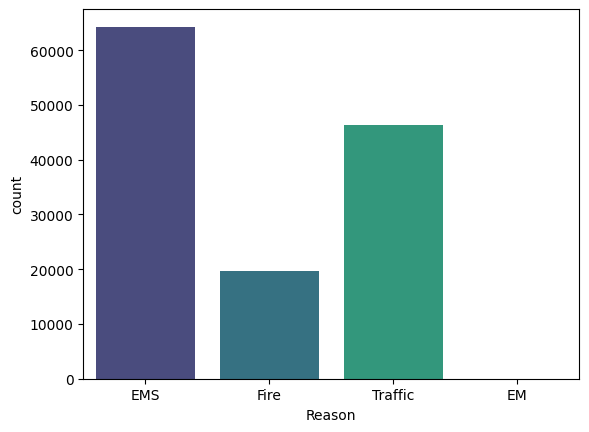

In [20]:
# Criar um countplot de chamadas 911 baseadas nesta nova coluna
sns.countplot(x='Reason', data=df, palette='viridis')

In [21]:
# Qual é o tipo de dados dos objetos na coluna timeStamp?
type(df['timeStamp'].iloc[1])

str

In [22]:
# Converter de strings em objetos DateTime
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [24]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [26]:
time = df['timeStamp'].iloc[3]

In [28]:
time.day

10

In [29]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)

In [30]:
df['Hour']

0         17.0
1         17.0
2         14.0
3         16.0
4         16.0
          ... 
130348    21.0
130349    21.0
130350    21.0
130351    21.0
130352     NaN
Name: Hour, Length: 130353, dtype: float64

In [31]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

In [32]:
df['Month'].head(9)

0    12.0
1    12.0
2    12.0
3    12.0
4    12.0
5    12.0
6    12.0
7    12.0
8    12.0
Name: Month, dtype: float64

In [33]:
df['Day of Week'].value_counts()

4.0    20107
2.0    19524
3.0    19391
1.0    19346
0.0    18992
5.0    17270
6.0    15722
Name: Day of Week, dtype: int64

In [35]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [37]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [38]:
df['Day of Week'].value_counts()

Fri    20107
Wed    19524
Thu    19391
Tue    19346
Mon    18992
Sat    17270
Sun    15722
Name: Day of Week, dtype: int64

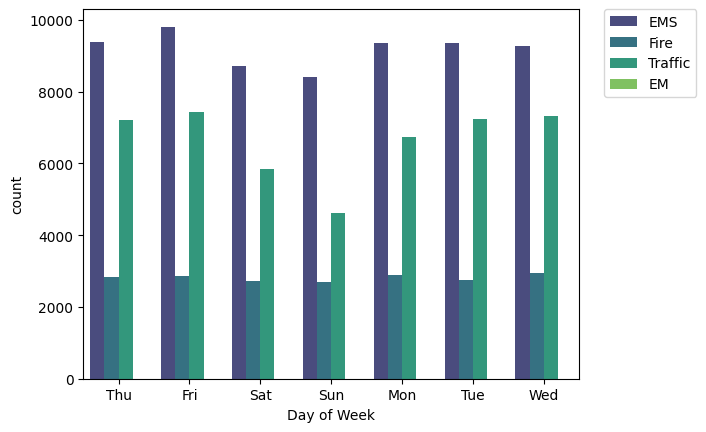

In [42]:
# Criar um countplot da coluna "Day of Week"
sns.countplot(x='Day of Week', data=df, hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

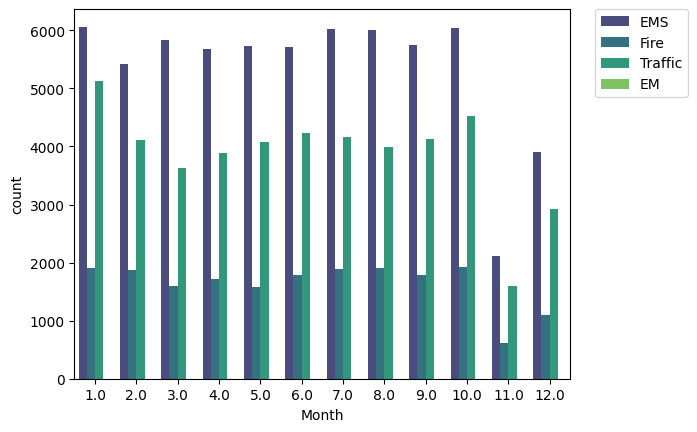

In [43]:
# Criar um countplot da coluna "Month"
sns.countplot(x='Month', data=df, hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [44]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1.0,13096,13096,13096,11512,13096,13096,13094,13096,13096,13096,13096,13096
2.0,11396,11396,11396,9926,11396,11396,11395,11396,11396,11396,11396,11396
3.0,11059,11059,11059,9754,11059,11059,11052,11059,11059,11059,11059,11059
4.0,11287,11287,11287,9897,11287,11287,11284,11287,11287,11287,11287,11287
5.0,11374,11374,11374,9938,11374,11374,11371,11374,11374,11374,11374,11374


<Axes: xlabel='Month'>

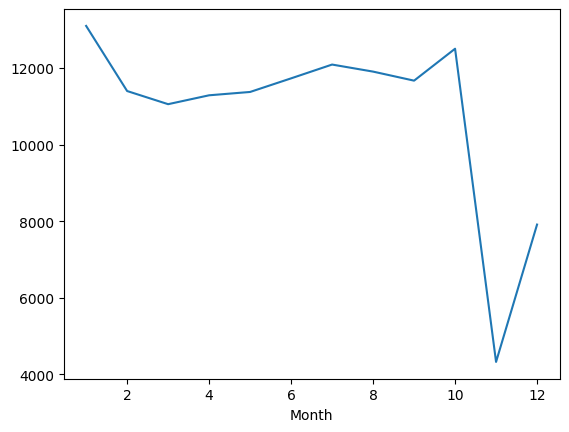

In [46]:
byMonth['twp'].plot()

In [47]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1.0,13096,13096,13096,11512,13096,13096,13094,13096,13096,13096,13096,13096
2.0,11396,11396,11396,9926,11396,11396,11395,11396,11396,11396,11396,11396
3.0,11059,11059,11059,9754,11059,11059,11052,11059,11059,11059,11059,11059
4.0,11287,11287,11287,9897,11287,11287,11284,11287,11287,11287,11287,11287
5.0,11374,11374,11374,9938,11374,11374,11371,11374,11374,11374,11374,11374
6.0,11732,11732,11732,10205,11732,11732,11726,11732,11732,11732,11732,11732
7.0,12088,12088,12088,10626,12088,12088,12086,12088,12088,12088,12088,12088
8.0,11904,11904,11904,10381,11904,11904,11902,11904,11904,11904,11904,11904
9.0,11669,11669,11669,10174,11669,11669,11666,11669,11669,11669,11669,11669


In [48]:
byMonth.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
0,1.0,13096,13096,13096,11512,13096,13096,13094,13096,13096,13096,13096,13096
1,2.0,11396,11396,11396,9926,11396,11396,11395,11396,11396,11396,11396,11396
2,3.0,11059,11059,11059,9754,11059,11059,11052,11059,11059,11059,11059,11059
3,4.0,11287,11287,11287,9897,11287,11287,11284,11287,11287,11287,11287,11287
4,5.0,11374,11374,11374,9938,11374,11374,11371,11374,11374,11374,11374,11374
5,6.0,11732,11732,11732,10205,11732,11732,11726,11732,11732,11732,11732,11732
6,7.0,12088,12088,12088,10626,12088,12088,12086,12088,12088,12088,12088,12088
7,8.0,11904,11904,11904,10381,11904,11904,11902,11904,11904,11904,11904,11904
8,9.0,11669,11669,11669,10174,11669,11669,11666,11669,11669,11669,11669,11669
9,10.0,12502,12502,12502,10760,12502,12502,12499,12502,12502,12502,12502,12502


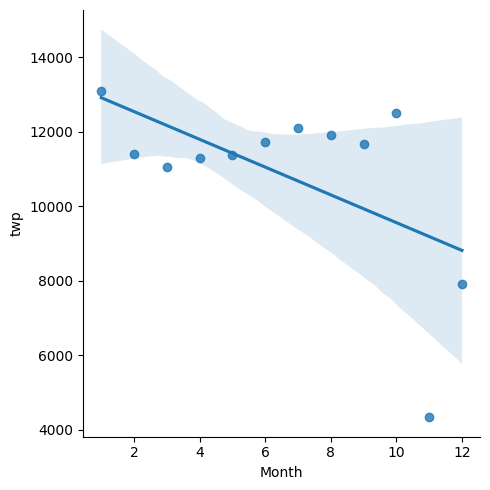

In [49]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

In [53]:
# Criar uma coluna chamada 'Data' que contenha a data da coluna timeStamp
df['Date'] = df['timeStamp'].apply(lambda x:x.date())

In [54]:
df['Date']

0         2015-12-10
1         2015-12-10
2         2015-12-10
3         2015-12-10
4         2015-12-10
             ...    
130348    2016-11-11
130349    2016-11-11
130350    2016-11-11
130351    2016-11-11
130352           NaT
Name: Date, Length: 130353, dtype: object

In [55]:
df.groupby('Date').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-11-07,407,407,407,361,407,407,406,407,407,407,407,407,407
2016-11-08,433,433,433,378,433,433,433,433,433,433,433,433,433
2016-11-09,432,432,432,379,432,432,432,432,432,432,432,432,432


<Axes: xlabel='Date'>

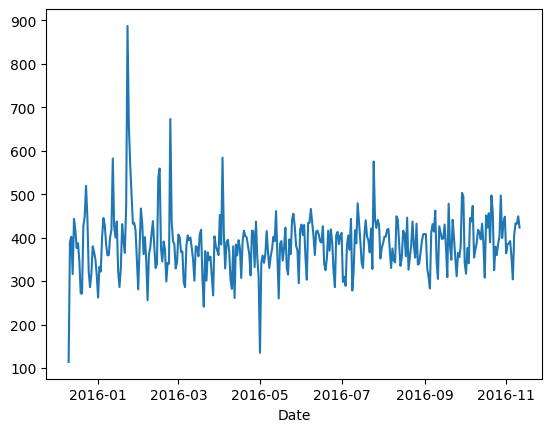

In [56]:
df.groupby('Date').count()['twp'].plot()

<Axes: xlabel='Date'>

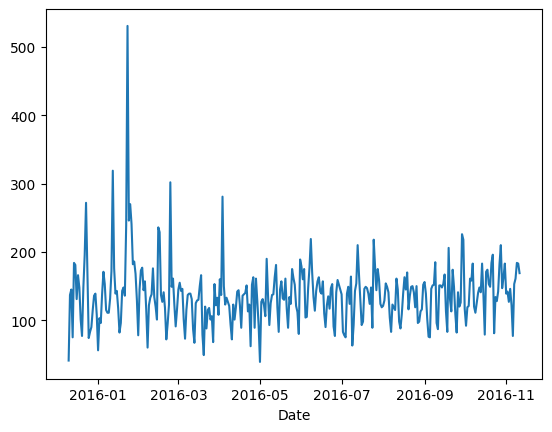

In [57]:
# Criando plots por cada razão
df[df['Reason'] == 'Traffic'].groupby('Date').count()['twp'].plot()


<Axes: xlabel='Date'>

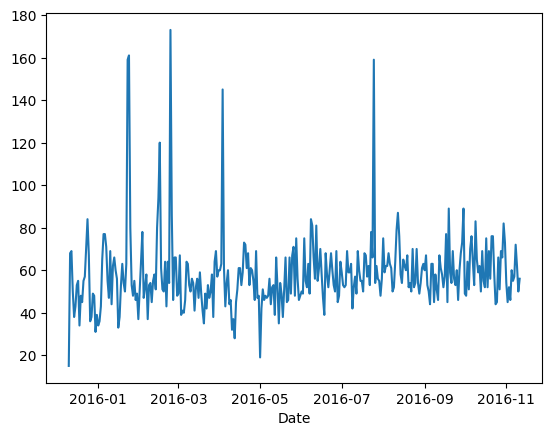

In [58]:
df[df['Reason'] == 'Fire'].groupby('Date').count()['twp'].plot()


<Axes: xlabel='Date'>

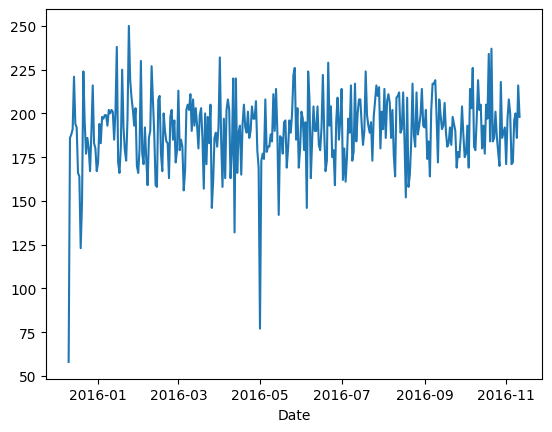

In [59]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['twp'].plot()

In [61]:
# Plotar graficos de horas e o indice dias de semana
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()
dayHour

lat  lng  desc  zip  title  timeStamp  twp  addr    e  \
Day of Week Hour                                                          
Fri         0.0   341  341   341  310    341        341  341   341  341   
            1.0   307  307   307  263    307        307  306   307  307   
            2.0   260  260   260  228    260        260  260   260  260   
            3.0   259  259   259  236    259        259  259   259  259   
            4.0   253  253   253  232    253        253  253   253  253   
...               ...  ...   ...  ...    ...        ...  ...   ...  ...   
Wed         19.0  925  925   925  795    925        925  925   925  925   
            20.0  827  827   827  732    827        827  827   827  827   
            21.0  704  704   704  634    704        704  703   704  704   
            22.0  579  579   579  523    579        579  579   579  579   
            23.0  427  427   427  382    427        427  426   427  427   

                  Reason  Month  Date  
Day of Week Hour                       
Fri         0.0      341    341   341  
            1.0      307    307   307  
            2.0      260    260   260  
            3.0      259    259   259  
            4.0      253    253   253  
...                  ...    ...   ...  
Wed         19.0     925    925   925  
            20.0     827    827   827  
            21.0     704    704   704  
            22.0     579    579   579  
            23.0     427    427   427  

[168 rows x 12 columns]

In [62]:
dayHour.unstack()

lat                                                 ...  Date  \
Hour        0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0   8.0   9.0   ...  14.0   
Day of Week                                                      ...         
Fri          341  307  260  259  253  302  540  871   990  1043  ...  1237   
Mon          359  282  270  235  263  334  532  884  1107  1059  ...  1107   
Sat          474  395  347  328  302  299  339  494   605   831  ...  1019   
Sun          483  423  384  353  295  310  360  514   606   785  ...   890   
Thu          335  259  280  212  249  295  504  888  1103  1143  ...  1180   
Tue          347  295  251  211  259  320  540  878  1128  1100  ...  1211   
Wed          327  293  234  265  208  323  544  935  1117  1055  ...  1197   

                                                               
Hour         15.0  16.0  17.0  18.0  19.0 20.0 21.0 22.0 23.0  
Day of Week                                                    
Fri          1352  1391  1360  1037  1004  872  769  691  594  
Mon          1211  1247  1281  1121   940  801  621  585  413  
Sat          1039  1051   996   950   932  796  725  644  612  
Sun           887   897   929   935   868  682  603  504  449  
Thu          1279  1225  1364  1123   949  806  721  563  454  
Tue          1201  1313  1318  1130   912  809  707  535  382  
Wed          1215  1349  1367  1152   925  827  704  579  427  

[7 rows x 288 columns]

In [65]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['twp'].unstack()
dayHour

Hour,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,341,306,260,259,253,302,540,871,990,1043,...,1236,1351,1391,1360,1036,1004,872,769,691,593
Mon,359,281,270,235,263,334,532,884,1107,1058,...,1107,1211,1246,1280,1121,940,801,620,585,413
Sat,472,395,347,328,301,299,339,494,605,831,...,1019,1039,1051,996,950,932,795,724,643,612
Sun,483,422,383,353,295,310,360,513,606,785,...,890,887,897,929,935,867,682,603,504,449
Thu,335,259,280,212,249,295,504,888,1103,1143,...,1180,1279,1225,1363,1123,947,806,721,563,454
Tue,347,295,251,211,259,320,540,878,1127,1099,...,1211,1201,1313,1318,1130,912,809,706,535,382
Wed,326,293,234,263,208,323,543,935,1117,1055,...,1197,1215,1348,1366,1152,925,827,703,579,426


<Axes: xlabel='Hour', ylabel='Day of Week'>

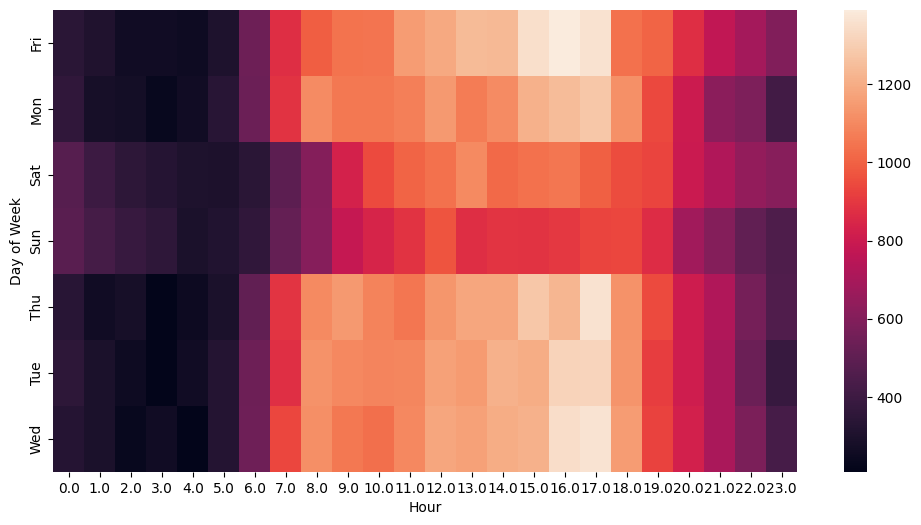

In [68]:
plt.figure(figsize=(12, 6))
sns.heatmap(dayHour)

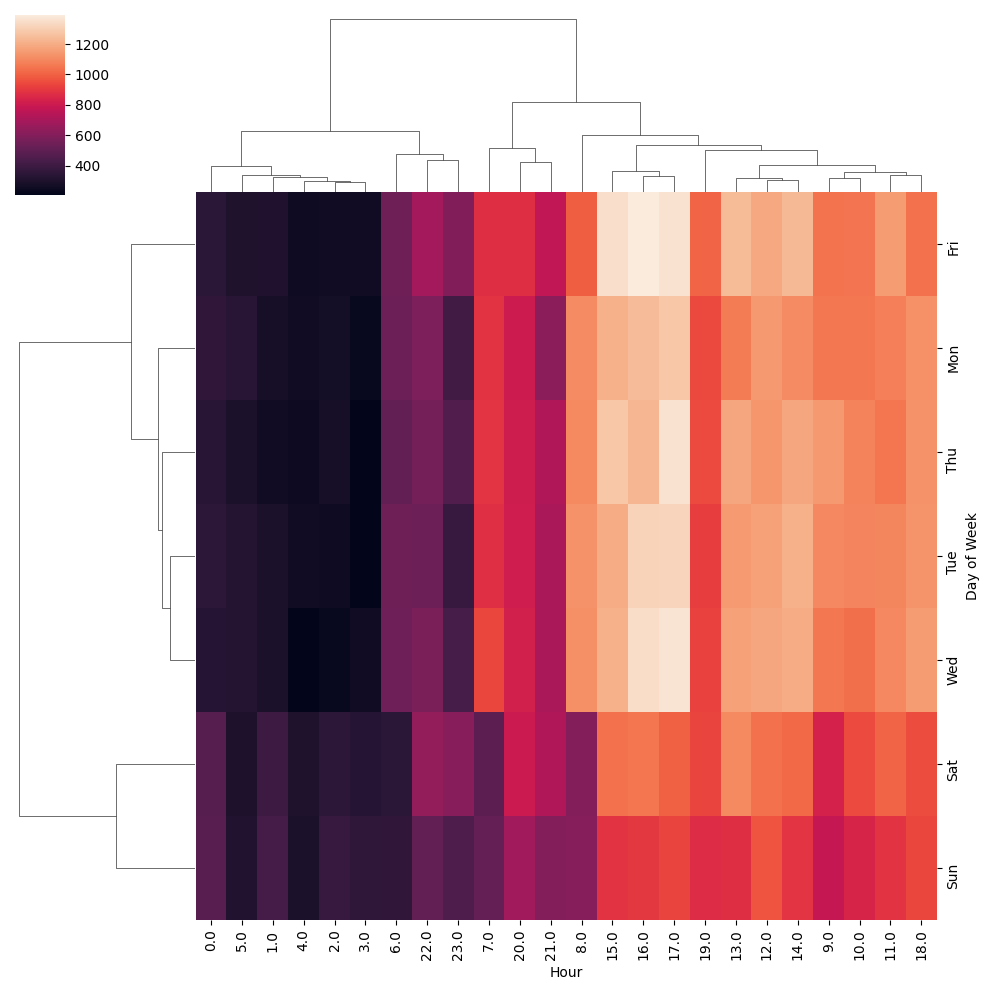

In [69]:
# Criando um clustermap
sns.clustermap(dayHour)

In [70]:
dayHour = df.groupby(by=['Day of Week', 'Month']).count()['twp'].unstack()
dayHour

Month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
Day of Week,,,,,,,,,,,,
Fri,1950,1564,1519,1949,1725,1647,2042,1740,2194,1899,815,1058
Mon,1718,1959,1533,1593,1776,1609,1685,1864,1552,2042,406,1250
Sat,2252,1434,1262,1734,1438,1376,1691,1423,1405,1935,353,960
Sun,1947,1223,1095,1486,1411,1328,1667,1360,1235,1757,304,904
Thu,1584,1582,1883,1592,1585,2055,1642,1578,2164,1625,836,1261
Tue,1961,1743,1871,1421,1903,1669,1650,1993,1559,1542,797,1233
Wed,1682,1890,1889,1509,1533,2042,1709,1944,1557,1699,816,1245


<Axes: xlabel='Month', ylabel='Day of Week'>

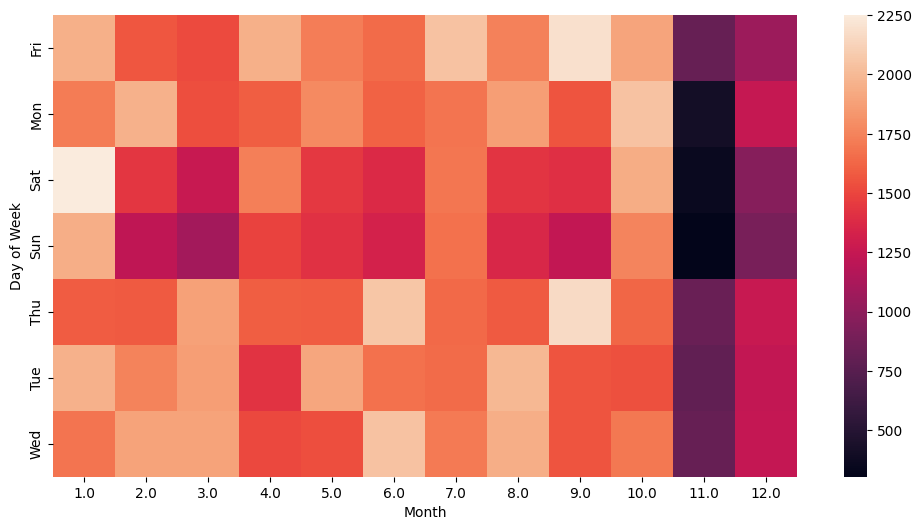

In [71]:
plt.figure(figsize=(12, 6))
sns.heatmap(dayHour)

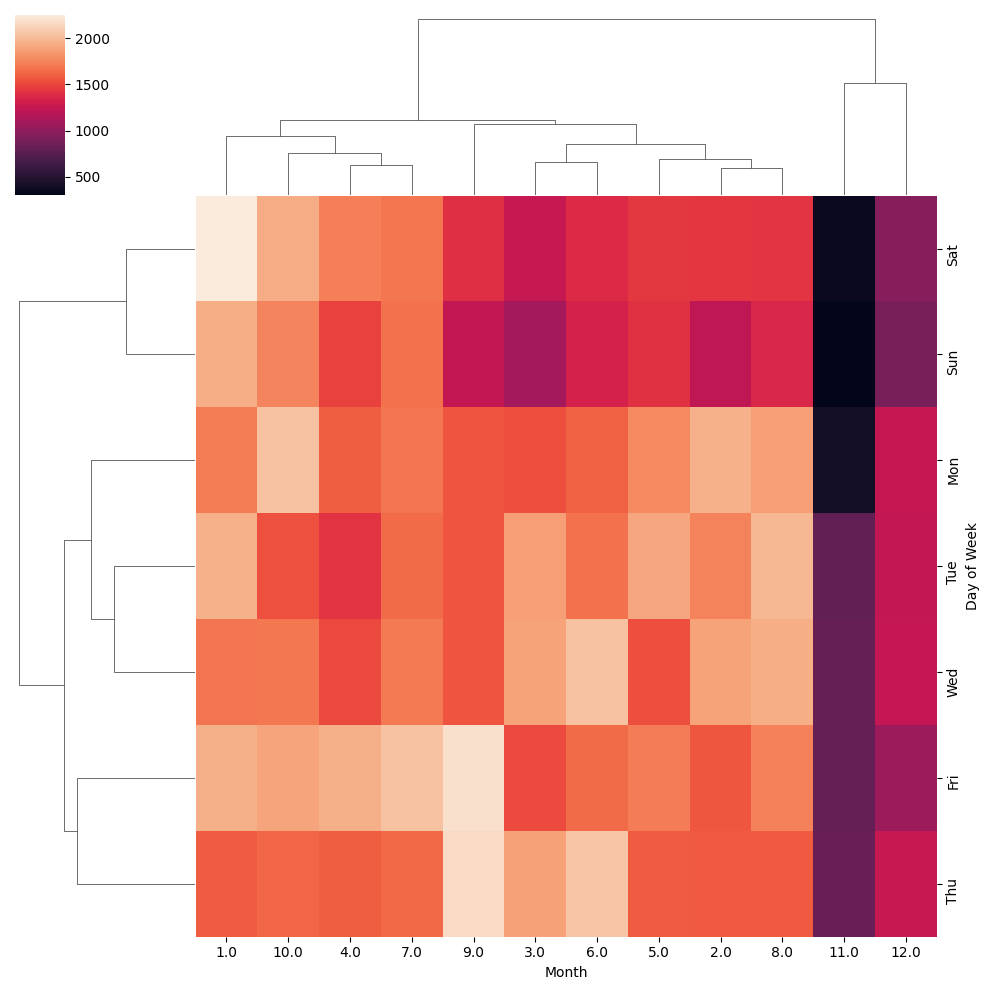

In [72]:
sns.clustermap(dayHour)